<a href="https://colab.research.google.com/github/HitenPatil27/Task1-heart-disease-preprocessing/blob/main/Task_1_Data_Cleaning_%26_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Step 2: Load the Dataset

In [3]:
df = pd.read_csv("/content/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Step 3: Understand the Dataset

In [4]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Step 4: Handle Missing Values

In [5]:
# This dataset typically doesn't have nulls, but you can still check and fill
df.fillna(df.median(), inplace=True)

Step 5: Encode Categorical Variables

In [6]:
df = pd.get_dummies(df, columns=['cp', 'thal', 'slope'], drop_first=True)

Step 6: Feature Scaling

In [7]:
scaler = StandardScaler()
cols_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

Step 7: Outlier Detection and Removal

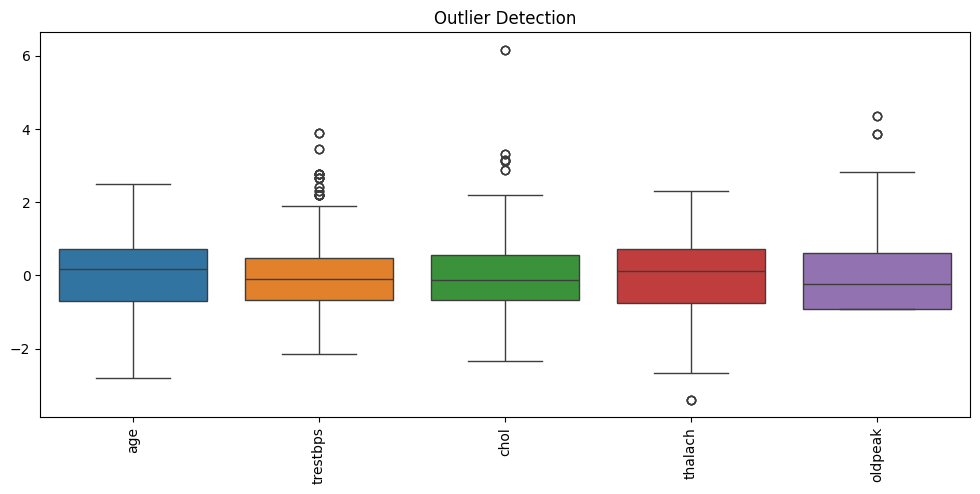

In [8]:
# Boxplot
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[cols_to_scale])
plt.xticks(rotation=90)
plt.title('Outlier Detection')
plt.show()

# Optional: remove outliers
df = df[df['chol'] < 500]

Final Output

In [9]:
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,-0.268437,1,-0.377636,-0.659332,0,1,0.821321,0,-0.060888,2,0,False,False,False,False,False,True,False,True
1,-0.158157,1,0.479107,-0.833861,1,0,0.255968,1,1.727137,0,0,False,False,False,False,False,True,False,False
2,1.716595,1,0.764688,-1.396233,0,1,-1.048692,1,1.301417,0,0,False,False,False,False,False,True,False,False
3,0.724079,1,0.936037,-0.833861,0,1,0.516900,0,-0.912329,1,0,False,False,False,False,False,True,False,True
4,0.834359,0,0.364875,0.930822,1,1,-1.874977,0,0.705408,3,0,False,False,False,False,True,False,True,False
